In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import numpy as np
from sklearn.linear_model import LinearRegression
from arch.unitroot import ADF

count    7113.000000
mean       -0.000010
std         1.000070
min        -6.818263
25%        -0.568047
50%         0.056104
75%         0.616504
max         4.516991
Name: z, dtype: float64


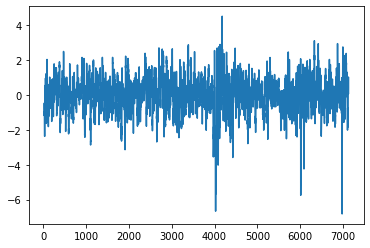

In [92]:
if not mt5.initialize(path="C:\Program Files\MetaTrader 5\\terminal64.exe"):
    print("initialize() failed, error code =", mt5.last_error())
    quit()
rates = mt5.copy_rates_from_pos("GBPUSD", mt5.TIMEFRAME_D1, 0 , 10000)
a = pd.DataFrame(rates)
a['time'] = pd.to_datetime(a['time'], unit='s')
a['return'] = a['close'].pct_change()
a['M20'] = a['close'].rolling(20).mean()
a['noTrend'] = a['close']/a['M20']
media = a['noTrend'].mean()
dp = a['noTrend'].std()
a['alvo'] = a['noTrend'].shift(-1)
a['z'] = (a['noTrend'] - media)/dp
a.dropna(inplace=True)
print(a['z'].describe())

a['z'].plot()

count    9986.000000
mean       -0.000023
std         0.002458
min        -0.079004
25%        -0.000973
50%         0.000000
75%         0.000954
max         0.039322
Name: return, dtype: float64


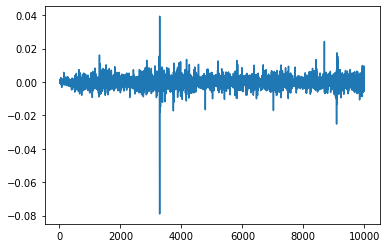

In [66]:
print(a['return'].describe())
a['return'].plot()


In [80]:
x = a['noTrend'].values.reshape(-1, 1)
y = a['alvo'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
resultado = reg.predict(x)
residuos = y - resultado
residuos

array([[ 7.42486057e-05],
       [ 6.24319704e-04],
       [-3.53207617e-05],
       ...,
       [-1.30356240e-03],
       [ 3.37639572e-04],
       [-1.31245464e-03]])

In [93]:
adf = ADF(a['noTrend'])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -14.274
P-value                         0.000
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
